<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Red neuronal aplicado al dataset ATP</header1></center>

Presentado por: Nathalia Marcela Martinez Vargas  <br>
Fecha: 4/12/2024

### Instalación de librerias

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install keras
!pip install tensorflow

### Importación de librerias

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

### Cargar el dataset unificado

Se tiene en cuenta que este dataset es de un límite temporal desde 2010 hasta 2024 en donde la temporada ya se encuentra finalizada. Además, estos datos son para el circuito masculino.

In [7]:
url = 'https://raw.githubusercontent.com/Renegada99/AnalisisDatosTenis/refs/heads/main/ATP/dataFinalATPTransformado.csv'
df_ATP = pd.read_csv(url, sep=',')
df_ATP

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,EXL,LBW,LBL,SJW,SJL,P_Total,R_Ajustado,P_Apuesta,E_Juegos,Ganador
0,1,Brisbane,Brisbane International,31/12/2023,ATP250,Outdoor,Hard,1st Round,3.0,Popyrin A.,...,0.00,0.00,0.00,0.00,0.00,22.0,0.579710,0.268817,1.055556,1
1,1,Brisbane,Brisbane International,31/12/2023,ATP250,Outdoor,Hard,1st Round,3.0,Shevchenko A.,...,0.00,0.00,0.00,0.00,0.00,27.0,0.527473,0.264550,2.000000,1
2,1,Brisbane,Brisbane International,1/01/2024,ATP250,Outdoor,Hard,1st Round,3.0,Safiullin R.,...,0.00,0.00,0.00,0.00,0.00,25.0,2.166667,0.232019,1.285714,1
3,1,Brisbane,Brisbane International,1/01/2024,ATP250,Outdoor,Hard,1st Round,3.0,Rune H.,...,0.00,0.00,0.00,0.00,0.00,24.0,0.173913,0.301205,1.230769,1
4,1,Brisbane,Brisbane International,1/01/2024,ATP250,Outdoor,Hard,1st Round,3.0,Dimitrov G.,...,0.00,0.00,0.00,0.00,0.00,24.0,0.325581,0.298507,1.214286,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38117,65,London,Masters Cup,26/11/2010,Masters Cup,Indoor,Hard,Round Robin,3.0,Nadal R.,...,4.25,1.20,4.33,1.20,4.50,26.0,0.142857,0.146628,1.625000,1
38118,65,London,Masters Cup,26/11/2010,Masters Cup,Indoor,Hard,Round Robin,3.0,Djokovic N.,...,2.75,1.36,3.00,1.44,2.75,27.0,0.333333,0.130208,2.000000,1
38119,65,London,Masters Cup,27/11/2010,Masters Cup,Indoor,Hard,Semifinals,3.0,Nadal R.,...,2.50,1.50,2.50,1.53,2.50,19.0,0.166667,0.124069,0.894737,1
38120,65,London,Masters Cup,27/11/2010,Masters Cup,Indoor,Hard,Semifinals,3.0,Federer R.,...,2.80,1.44,2.63,1.36,3.00,27.0,0.500000,0.131234,2.000000,1


In [9]:
# Verificar que las métricas existan en el dataset
required_columns = [
    'P_Total', 'R_Ajustado', 'E_Juegos', 
    'P_Apuesta', 'WRank', 'LRank', 'WPts', 'LPts', 'Ganador'
]
for column in required_columns:
    if column not in df_ATP.columns:
        raise ValueError(f"La columna {column} no se encuentra en el dataset.")

In [11]:
# Seleccionar características y objetivo
features = [
    'P_Total', 'R_Ajustado', 'E_Juegos', 
    'P_Apuesta', 'WRank', 'LRank', 'WPts', 'LPts'
]
X = df_ATP[features]
y = df_ATP['Ganador']  # Columna binaria o categórica que indica el ganador

In [13]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar los tamaños de los conjuntos de datos
print("Tamaño del conjunto de entrenamiento:\n", X_train.shape[0], "Instancias\n", X_train.shape[1], "Variables de entrada")
print("Tamaño del conjunto de prueba:\n", X_test.shape[0], "Instancias\n", X_test.shape[1], "Variables de entrada")

Tamaño del conjunto de entrenamiento:
 30497 Instancias
 8 Variables de entrada
Tamaño del conjunto de prueba:
 7625 Instancias
 8 Variables de entrada


In [15]:
# Verificar NaN e inf en X_train
print("Valores NaN en X_train:\n", X_train.isna().sum())
print("Valores infinitos en X_train:\n", X_train.replace([np.inf, -np.inf], np.nan).isna().sum())

# Verificar NaN e inf en X_test
print("Valores NaN en X_test:\n", X_test.isna().sum())
print("Valores infinitos en X_test:\n", X_test.replace([np.inf, -np.inf], np.nan).isna().sum())

Valores NaN en X_train:
 P_Total       0
R_Ajustado    0
E_Juegos      0
P_Apuesta     1
WRank         0
LRank         0
WPts          0
LPts          0
dtype: int64
Valores infinitos en X_train:
 P_Total        0
R_Ajustado     0
E_Juegos       0
P_Apuesta     10
WRank          0
LRank          0
WPts           0
LPts           0
dtype: int64
Valores NaN en X_test:
 P_Total       0
R_Ajustado    0
E_Juegos      0
P_Apuesta     0
WRank         0
LRank         0
WPts          0
LPts          0
dtype: int64
Valores infinitos en X_test:
 P_Total       0
R_Ajustado    0
E_Juegos      0
P_Apuesta     0
WRank         0
LRank         0
WPts          0
LPts          0
dtype: int64


In [17]:
# Reemplazar NaN y valores infinitos por la media de cada columna
X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(X_train.mean())

In [19]:
print("Valores máximos en X_train:\n", X_train.max())
print("Valores mínimos en X_train:\n", X_train.min())

Valores máximos en X_train:
 P_Total          90.0
R_Ajustado      532.0
E_Juegos         14.0
P_Apuesta         inf
WRank          1890.0
LRank          4915.0
WPts          16950.0
LPts          16950.0
dtype: float64
Valores mínimos en X_train:
 P_Total      -4.000000
R_Ajustado    0.000000
E_Juegos      0.000000
P_Apuesta     0.008929
WRank         0.000000
LRank         0.000000
WPts          0.000000
LPts          0.000000
dtype: float64


In [21]:
# Reemplazar valores infinitos por el valor máximo finito de la columna
X_train['P_Apuesta'] = X_train['P_Apuesta'].replace(np.inf, X_train['P_Apuesta'][np.isfinite(X_train['P_Apuesta'])].max())


In [23]:
print("Valores máximos después de reemplazar infinitos:\n", X_train.max())
print("Valores mínimos después de reemplazar infinitos:\n", X_train.min())
print("Valores máximos después de reemplazar infinitos:\n", X_test.max())
print("Valores mínimos después de reemplazar infinitos:\n", X_test.min())

Valores máximos después de reemplazar infinitos:
 P_Total          90.0
R_Ajustado      532.0
E_Juegos         14.0
P_Apuesta         1.0
WRank          1890.0
LRank          4915.0
WPts          16950.0
LPts          16950.0
dtype: float64
Valores mínimos después de reemplazar infinitos:
 P_Total      -4.000000
R_Ajustado    0.000000
E_Juegos      0.000000
P_Apuesta     0.008929
WRank         0.000000
LRank         0.000000
WPts          0.000000
LPts          0.000000
dtype: float64
Valores máximos después de reemplazar infinitos:
 P_Total          46.000000
R_Ajustado      290.000000
E_Juegos         12.000000
P_Apuesta         0.943396
WRank          1187.000000
LRank          3390.000000
WPts          16790.000000
LPts          16540.000000
dtype: float64
Valores mínimos después de reemplazar infinitos:
 P_Total      -5.000000
R_Ajustado    0.000000
E_Juegos      0.000000
P_Apuesta     0.014493
WRank         0.000000
LRank         0.000000
WPts          0.000000
LPts          0.00

In [25]:
# Escalar los datos
scaler = MinMaxScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba con el mismo scaler
X_test_scaled = scaler.transform(X_test)

# Escalar las variables objetivo (asegúrate de usar el mismo scaler o un scaler separado para las etiquetas)
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

In [27]:
# Modelo de red neuronal
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Salida binaria
])

# Compilación del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Configurar EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Entrenamiento del modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]  # Agregar EarlyStopping
)

# Evaluación del modelo
results = model.evaluate(X_test, y_test)

# Acceso a los resultados
loss = results[0]  # Loss es el primer valor
accuracy = results[1]  # Accuracy es el segundo valor

# Imprimir los resultados
print(f"Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

Epoch 1/100


C:\Users\Nathi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


954/954 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - accuracy: 0.9558 - loss: 8.6599 - val_accuracy: 0.9789 - val_loss: 0.2204
Epoch 2/100
954/954 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step - accuracy: 0.9806 - loss: 0.3662 - val_accuracy: 0.9789 - val_loss: 0.1239
Epoch 3/100
954/954 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step - accuracy: 0.9826 - loss: 0.1623 - val_accuracy: 0.9789 - val_loss: 0.1114
Epoch 4/100
954/954 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - accuracy: 0.9831 - loss: 0.1192 - val_accuracy: 0.9789 - val_loss: 0.1036
Epoch 5/100
954/954 ━━━━━━━━━━━━━━━━━━━━ 1s 568us/step - accuracy: 0.9843 - loss: 0.1058 - val_accuracy: 0.9789 - val_loss: 0.1025
Epoch 6/100
954/954 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step - accuracy: 0.9826 - loss: 0.1014 - val_accuracy: 0.9789 - val_loss: 0.1042
Epoch 7/100
954/954 ━━━━━━━━━━━━━━━━━━━━ 1s 648us/step - accuracy: 0.9820 - loss: 0.0914 - val_accuracy: 0.9789 - val_loss: 0.1029
Epoch 8/100
954/954 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - accuracy: 0.9826 - loss: 0.0896 - val_

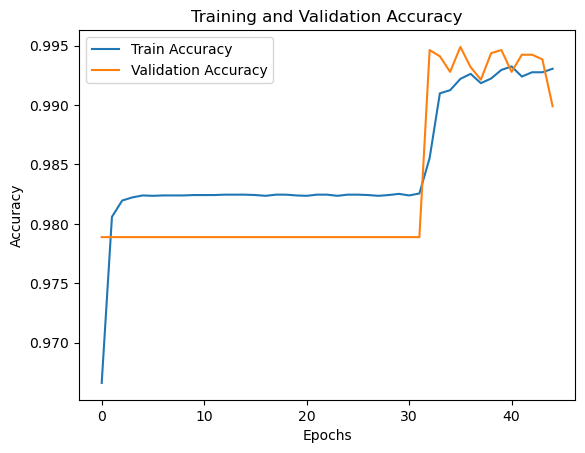

In [29]:
# Visualizar la precisión del entrenamiento
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()